In [1]:
import ee
import geemap
import rasterio as rio
from rasterio.plot import show
import os
import time
from IPython.display import Image
from pylandstats import Landscape
import numpy as np

Module D:\Fall_2023\Python\Mambaforge\envs\musa-650\lib\site-packages\pylandstats\landscape.py has not been compiled for Transonic-Numba


In [2]:
# Authenticate and initialize Earth Engine
!earthengine authenticate --force

# Specify your Earth Engine project ID
project_id = 'musa650-final-sk-rg'

# Initialize Earth Engine with your project ID
ee.Initialize(project=project_id)

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=http%3A%2F%2Flocalhost%3A8085&response_type=code&code_challenge=u9WJs4AyDREXA7kQrn26po2CfbghpEId_QwEJv2oipU&code_challenge_method=S256

Waiting for successful authorization from web browser ...

Successfully saved authorization token.


In [9]:
import rasterio as rio


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [10]:
# Open the file and get a file "handle"
raster1 = rio.open("./data/Year2023/Dynamic_World_Labels_20230103T042149_20230103T042448_T46RDQ.tif")

raster1

<open DatasetReader name='./data/Year2023/Dynamic_World_Labels_20230103T042149_20230103T042448_T46RDQ.tif' mode='r'>

In [11]:
raster1.crs

CRS.from_epsg(32646)

In [12]:
raster1.bounds

BoundingBox(left=467370.0, bottom=2975050.0, right=509530.0, top=2929750.0)

In [13]:
raster1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 4216,
 'height': 4530,
 'count': 3,
 'crs': CRS.from_epsg(32646),
 'transform': Affine(10.0, 0.0, 467370.0,
        0.0, 10.0, 2929750.0)}

TypeError: Image data of dtype object cannot be converted to float

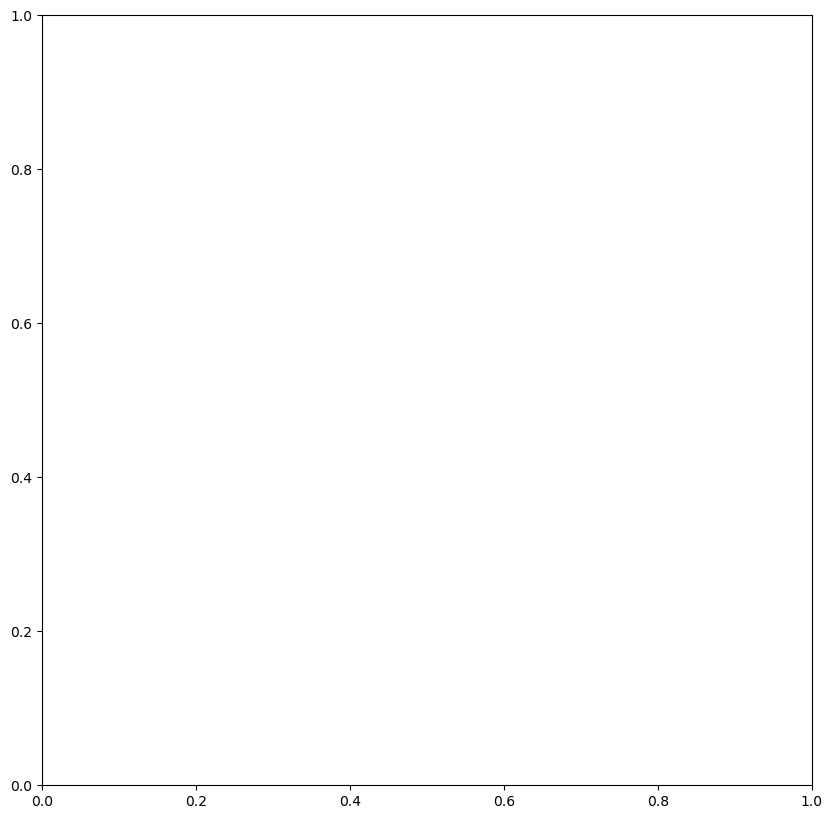

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

img = ax.imshow(raster1)

plt.colorbar(img);

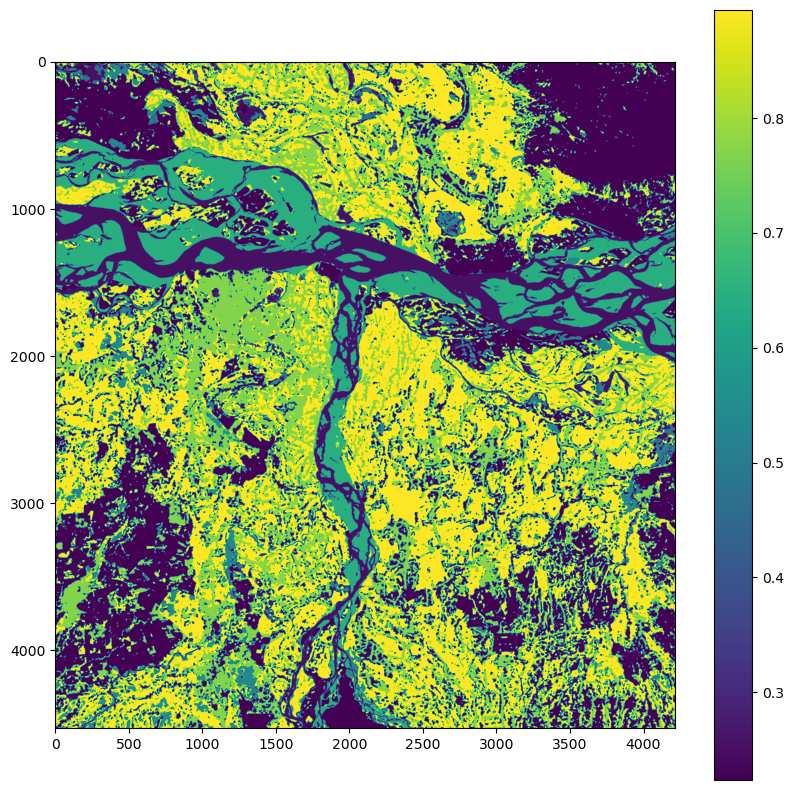

In [16]:
# Open the raster image
with rasterio.open('./data/Year2023/Dynamic_World_Labels_20230103T042149_20230103T042448_T46RDQ.tif') as src:
    raster_array = src.read(1)  # Read the first band of the raster

# Display the raster image
fig, ax = plt.subplots(figsize=(10, 10))
img = ax.imshow(raster_array, cmap='viridis')  # Adjust the colormap as needed
plt.colorbar(img)
plt.show()

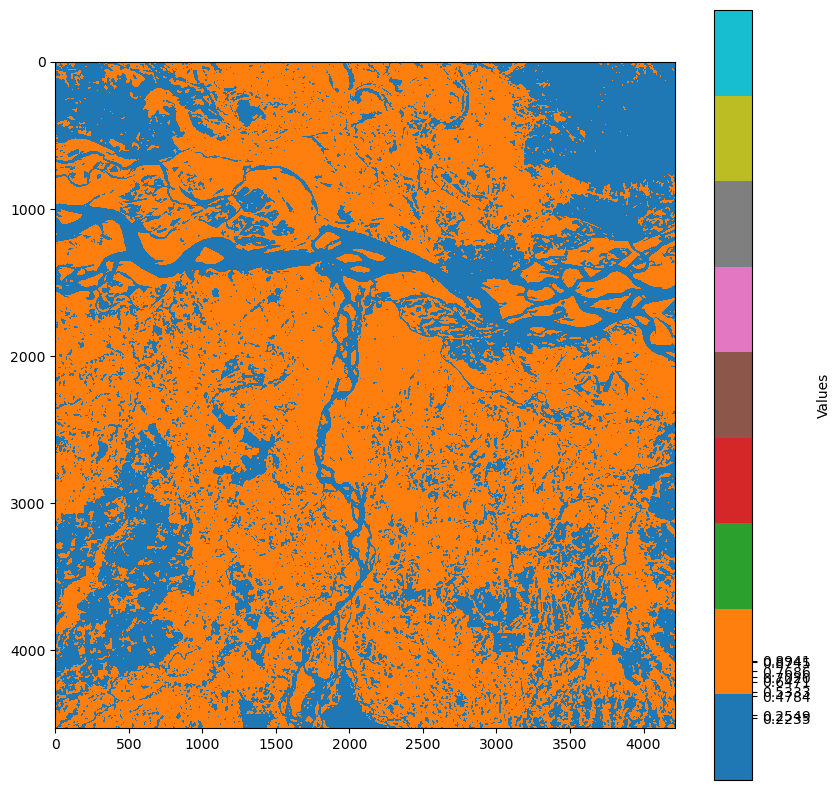

In [18]:
with rasterio.open('./data/Year2023/Dynamic_World_Labels_20230103T042149_20230103T042448_T46RDQ.tif') as src:
    raster_array = src.read(1)  # Read the first band of the raster

# Get unique values in the raster data
unique_values = np.unique(raster_array)

# Define discrete colormap with distinct colors for each unique value
num_values = len(unique_values)
cmap = plt.cm.get_cmap('tab10', num_values)  # Use tab10 colormap with the number of unique values
bounds = np.arange(num_values + 1) - 0.5  # Define boundaries for discrete values
norm = plt.Normalize(bounds.min(), bounds.max())

# Display the raster image with discrete colormap
fig, ax = plt.subplots(figsize=(10, 10))
img = ax.imshow(raster_array, cmap=cmap, norm=norm)
cbar = plt.colorbar(img, ticks=unique_values)
cbar.set_label('Values')
plt.show()

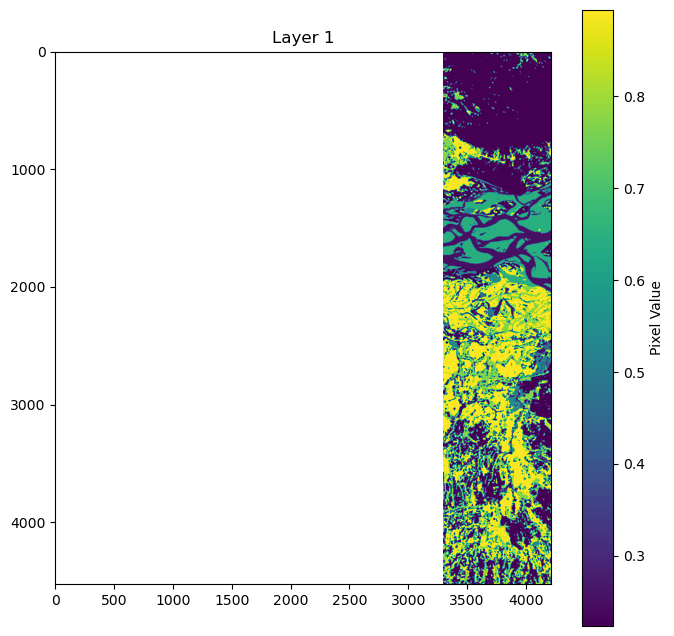

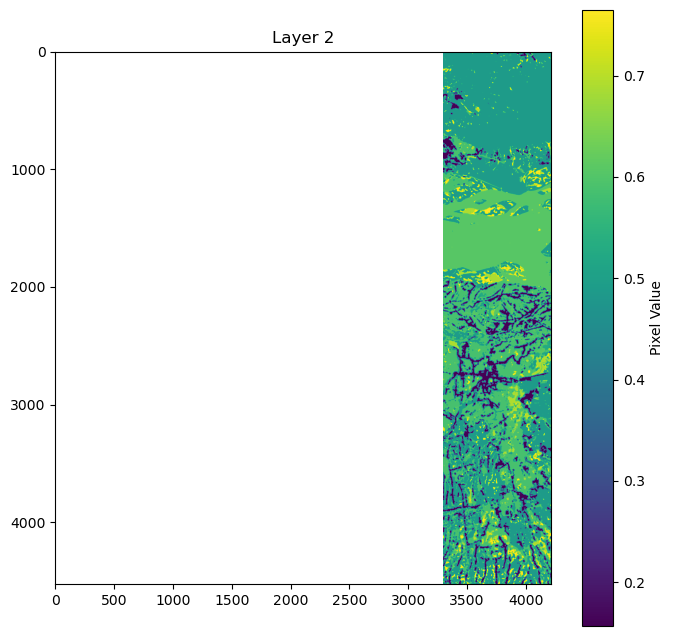

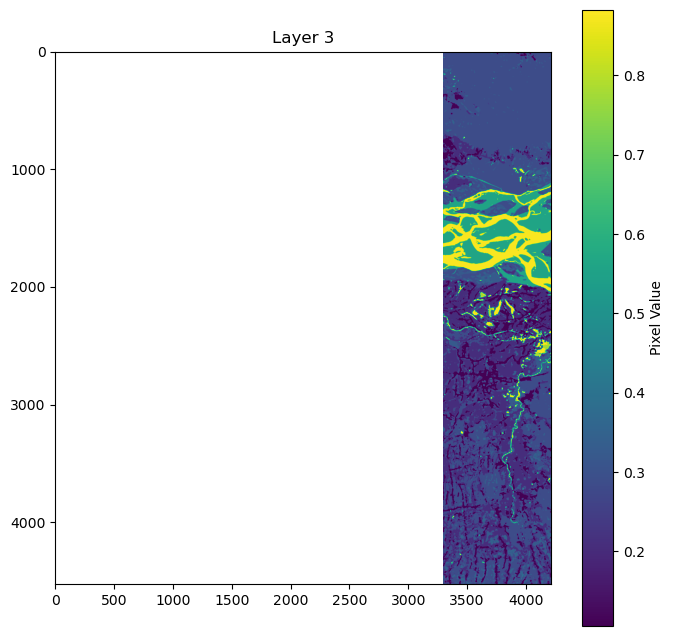

In [22]:

# Open the TIFF file
with rasterio.open('./data/Year2023/Dynamic_World_Labels_20230103T042149_20230103T042448_T46REQ.tif') as src:
    # Get the number of bands (layers) in the TIFF file
    num_bands = src.count
    
    # Iterate over each band (layer) in the TIFF file
    for i in range(1, num_bands + 1):
        # Read the band data
        band_data = src.read(i)
        
        # Visualize the band data
        plt.figure(figsize=(8, 8))
        plt.imshow(band_data, cmap='viridis')  # Use cmap='gray' for grayscale images
        plt.title(f"Layer {i}")
        plt.colorbar(label='Pixel Value')
        plt.show()